In [29]:
import quandl
import pandas as pd
import os
from sklearn import metrics
import time
quandl.ApiConfig.api_key="wVzbgQ9HyRgyeZs9gbNd"
data = quandl.get("EOD/AAPL")
#data = quandl.get("EIA/PET_RWTC_D")

print(data)

                Open      High       Low    Close      Volume  Dividend  \
Date                                                                      
2013-09-03  493.1000  500.6000  487.3500  488.580  11854600.0       0.0   
2013-09-04  499.5600  502.2400  496.2800  498.691  12322600.0       0.0   
2013-09-05  500.2500  500.6800  493.6400  495.270   8441700.0       0.0   
2013-09-06  498.4400  499.3800  489.9500  498.220  12840200.0       0.0   
2013-09-09  505.0000  507.9200  503.4800  506.170  12167400.0       0.0   
2013-09-10  506.2000  507.4500  489.5000  494.640  26542700.0       0.0   
2013-09-11  467.0101  473.6900  464.8100  467.710  32096300.0       0.0   
2013-09-12  468.5000  475.4000  466.0100  472.690  14430400.0       0.0   
2013-09-13  469.3402  471.8292  464.7000  464.900  10672700.0       0.0   
2013-09-16  461.0000  461.6099  447.2200  450.120  19418100.0       0.0   
2013-09-17  447.9600  459.7100  447.5000  455.320  14263600.0       0.0   
2013-09-18  463.1800  466

In [23]:
df = data.copy()
df.shape

(1090, 12)

In [24]:
df.describe(include="all")

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


In [21]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [41]:
corr_rel=df.corr()
print(corr_rel)

                Open      High       Low     Close    Volume  Dividend  \
Open        1.000000  0.999948  0.999935  0.999866 -0.547597  0.088894   
High        0.999948  1.000000  0.999941  0.999944 -0.545893  0.088582   
Low         0.999935  0.999941  1.000000  0.999949 -0.550156  0.089065   
Close       0.999866  0.999944  0.999949  1.000000 -0.548315  0.088610   
Volume     -0.547597 -0.545893 -0.550156 -0.548315  1.000000 -0.061064   
Dividend    0.088894  0.088582  0.089065  0.088610 -0.061064  1.000000   
Split      -0.019234 -0.019154 -0.019259 -0.019044  0.054382 -0.002708   
Adj_Open   -0.534445 -0.535283 -0.533844 -0.534448  0.085888 -0.050353   
Adj_High   -0.537418 -0.538038 -0.536724 -0.537173  0.095572 -0.051215   
Adj_Low    -0.531829 -0.532575 -0.530960 -0.531552  0.071723 -0.050306   
Adj_Close  -0.534399 -0.534990 -0.533517 -0.533903  0.081938 -0.051095   
Adj_Volume  0.502054  0.504125  0.498174  0.500617  0.337092  0.002395   
HL_PCT     -0.070638 -0.067059 -0.0756

In [26]:
df.mean()

Open          1.945645e+02
High          1.961147e+02
Low           1.930167e+02
Close         1.946131e+02
Volume        3.605114e+07
Dividend      1.564220e-02
Split         1.005505e+00
Adj_Open      2.636755e+01
Adj_High      2.657824e+01
Adj_Low       2.615204e+01
Adj_Close     2.637320e+01
Adj_Volume    1.931334e+08
dtype: float64

In [27]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

In [28]:
df.fillna(-9999)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.1000,500.6000,487.3500,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,499.5600,502.2400,496.2800,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,500.2500,500.6800,493.6400,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,498.4400,499.3800,489.9500,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,505.0000,507.9200,503.4800,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
2013-09-10,506.2000,507.4500,489.5000,494.640,26542700.0,0.0,1.0,16.034611,16.074207,15.505615,15.668432,743195600.0,3.628902,-2.283682
2013-09-11,467.0101,473.6900,464.8100,467.710,32096300.0,0.0,1.0,14.793215,15.004810,14.723524,14.815385,898696400.0,1.898612,0.149868
2013-09-12,468.5000,475.4000,466.0100,472.690,14430400.0,0.0,1.0,14.840410,15.058977,14.761535,14.973134,404051200.0,1.986503,0.894344
2013-09-13,469.3402,471.8292,464.7000,464.900,10672700.0,0.0,1.0,14.867024,14.945867,14.720039,14.726374,298835600.0,1.533491,-0.946051


In [30]:
x=df[['High','Low','Open','Volume']].values
y=df['Close'].values

In [39]:
from sklearn import linear_model
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = regressor.predict(x_test)

In [40]:
mean_squared_error(y_test, y_pred)

1.2740595838260482

In [42]:
from sklearn.metrics import r2_score

In [44]:
 r2_score(y_test, y_pred)

0.9999501069272289

In [45]:
import matplotlib.pyplot as plt

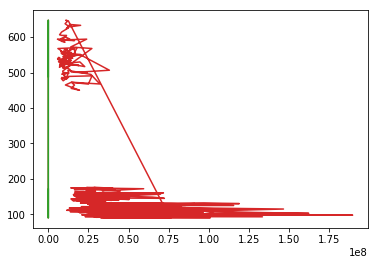

In [46]:
plt.plot(x,y)
plt.show()

ValueError: x and y must be the same size

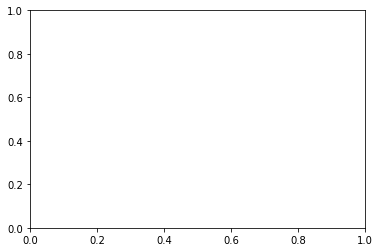

In [47]:
plt.scatter(x,y)

In [54]:
response=regressor.predict(x)

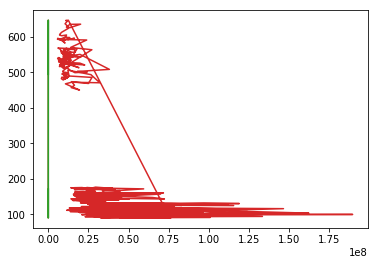

In [55]:
plt.plot(x,response)